# Modelos de Regresión Lineal
## Modelos con datos simulados
* y = a + b * x
* X : 100 valores distribuidos segun una N(1.5 , 2.5)
* Ye = 6 + 6 * x
* e estará distribuida según una N(0, 0.8)

In [41]:
import pandas as pd
import numpy as np

In [42]:
x = 1.5 + 2.5*np.random.randn(100)

In [43]:
res = 0 + 0.8 * np.random.randn(100)

In [44]:
y_pred = 6 + 6 * x

In [45]:
y_act = 6 + 6 * x + res

In [46]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [47]:
data = pd.DataFrame({
    "x" : x_list,
    "y_actual" : y_act_list,
    "y_prediccion" : y_pred_list
})

In [48]:
data.head()

,x,y_actual,y_prediccion
0,-1.077754,0.371415,-0.466522
1,1.008525,12.830780,12.051152
2,1.513956,15.564779,15.083736
3,4.188954,30.292230,31.133722
4,0.981094,12.742391,11.886564


In [49]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

In [50]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor actual vs Predicción')

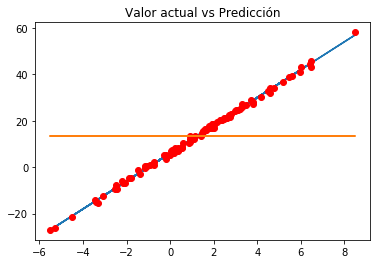

In [51]:
%matplotlib inline
plt.plot(x,y_pred)
plt.plot(x, y_act, "ro")
plt.plot(x, y_mean)
plt.title("Valor actual vs Predicción")

In [52]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [53]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [54]:
SSR

26309.045412935502

In [55]:
SSD

60.819264878267404

In [56]:
SST

26343.35122524139

In [57]:
SSR + SSD

26369.86467781377

In [58]:
R2 = SSR/SST

In [59]:
R2

0.9986977430467154

(array([ 2.,  4.,  5., 19., 16., 18., 15., 10.,  7.,  4.]),
 array([-1.98036339, -1.61161457, -1.24286576, -0.87411694, -0.50536812,
        -0.13661931,  0.23212951,  0.60087833,  0.96962714,  1.33837596,
         1.70712478]),
 <a list of 10 Patch objects>)

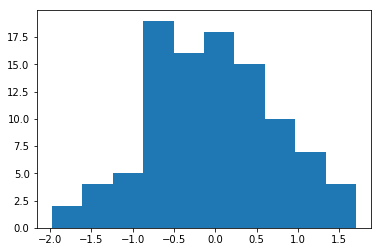

In [61]:
plt.hist(data["y_prediccion"] - data["y_actual"])

## Obteniendo la recta de regresión
* y = a + b*x
* b = sum(xi-x_m)*(yi - y_m)/sum(xi-x_m)**2
* a = y_m - b*x_m

In [62]:
x_mean = np.mean(data["x"])

In [64]:
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2209572010266363, 13.379845039989755)

In [65]:
data["beta_n"] = (data["x"] - x_mean) * (data["y_actual"] - y_mean)
data["beta_d"] = (data["x"]- x_mean)**2

In [66]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [67]:
alpha = y_mean - beta*x_mean

In [68]:
alpha, beta

(6.057711701707702, 5.997043411616124)

El modelo lineal obtenido por regresión es:
y = 6.057711701707702 +  5.997043411616124 * x

In [69]:
data["y_model"] = alpha + beta * data["x"]

In [70]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,-1.077754,0.371415,-0.466522,191.721884,0.702139,169.219239,29.902619,5.284072,-0.405624
1,1.008525,12.830780,12.051152,1.765425,0.607820,0.301472,0.116639,0.045127,12.105882
2,1.513956,15.564779,15.083736,2.903244,0.231403,4.773937,0.640183,0.085848,15.136971
3,4.188954,30.292230,31.133722,315.200163,0.708109,286.028772,50.195901,8.809003,31.179049
4,0.981094,12.742391,11.886564,2.229889,0.732440,0.406348,0.152902,0.057534,11.941375


In [74]:
SSR =  sum((data["y_model"] - y_mean)**2)
SSD = sum((data["y_model"] - data["y_actual"])**2)
SST = sum((data["y_actual"] - y_mean)**2)

In [75]:
SSR, SSD, SST

(26282.83104942001, 60.52017582138536, 26343.35122524139)

In [76]:
R2 = SSR / SST
R2

0.9977026394514532

Text(0.5, 1.0, 'Valor actual vs Predicción')

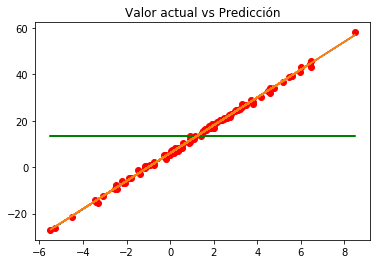

In [78]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"], y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor actual vs Predicción")